In [30]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

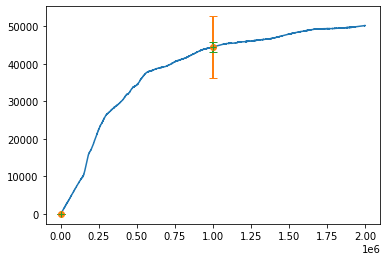

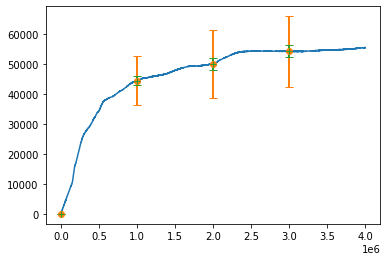

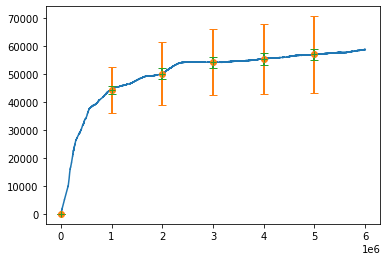

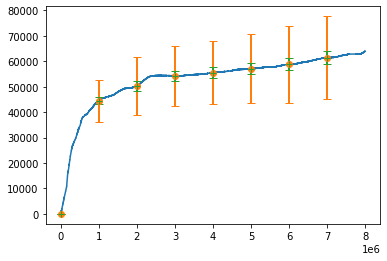

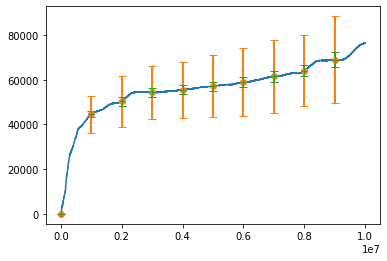

In [133]:
mean_regret = np.array([])
conf_length = np.array([])
std_regret = np.array([])
conf_bound = np.array([[], []])
for epoch_pos in range(5):
    sim_regret = []
    for sim in range(50):
        with open('../../data/CT-UCRL/EX1/delta_001/regret_sim{}'.format(sim), 'rb') as file:
            opt_regret = pkl.load(file)
            opt_regret = np.array([regret[0] for regret in opt_regret])
            sim_regret.append(opt_regret[epoch_pos * int(2e6): (epoch_pos + 1) * int(2e6)])
    np_sim_regret = np.array(sim_regret)
    sim_regret_mean = np_sim_regret.mean(axis=0)
    mean_regret = np.hstack((mean_regret, sim_regret_mean))
    std_regret = np.hstack((std_regret, np_sim_regret.std(axis=0)))
    conf_bound = np.vstack((
        np.hstack((conf_bound[0, :], sim_regret_mean - np.quantile(np_sim_regret, 0.025, axis=0))),
        np.hstack((conf_bound[1, :], np.quantile(np_sim_regret, 0.975, axis=0) - sim_regret_mean))
        ))
    conf_length = np.hstack((
        conf_length, np.quantile(np_sim_regret, 0.975, axis=0) / 2 - np.quantile(np_sim_regret, 0.025, axis=0) / 2))
#     plt.errorbar(range(0, (epoch_pos + 1) * int(2e6), int(5e5)), 
#                  mean_regret[::int(5e5)], yerr=conf_bound[:, ::int(5e5)], 
#                  elinewidth=2, capsize=4)
    plt.plot(mean_regret)
    plt.errorbar(range(0, (epoch_pos + 1) * int(2e6), int(10e5)), 
                 mean_regret[::int(10e5)], yerr=conf_length[::int(10e5)], 
                 elinewidth=2, capsize=4, fmt='o')
    plt.errorbar(range(0, (epoch_pos + 1) * int(2e6), int(10e5)), 
                 mean_regret[::int(10e5)],
                 yerr=1.96 * std_regret[::int(10e5)] / np.sqrt(50), 
                 elinewidth=2, capsize=4, fmt='+')

    plt.show()

In [134]:
# with open('../../data/CT-UCRL/EX1/delta_001/mean_regret', 'wb') as file:
#     pkl.dump(mean_regret, file)
# with open('../../data/CT-UCRL/EX1/delta_001/std_regret', 'wb') as file:
#     pkl.dump(std_regret, file)
# with open('../../data/CT-UCRL/EX1/delta_001/quantile975_regret', 'wb') as file:
#     pkl.dump(conf_bound[0, :], file)
# with open('../../data/CT-UCRL/EX1/delta_001/quantile025_regret', 'wb') as file:
#     pkl.dump(conf_bound[1, :], file)
# with open('../../data/CT-UCRL/EX1/delta_001/quantilelength_regret', 'wb') as file:
#     pkl.dump(conf_length, file)

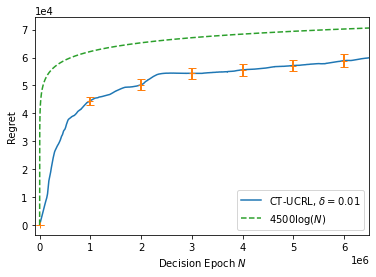

In [166]:
log_factor = 4500
sqrt_factor = 40
label_gap = 50
ci_gap = int(1e6)
num_dec_epoch = int(6.9e6)
xlabel = [1] + [k * label_gap for k in range(1, num_dec_epoch // label_gap + 1)]
plt.plot(range(0, num_dec_epoch, label_gap), mean_regret[:num_dec_epoch:label_gap],
         label = r'CT-UCRL, $\delta=0.01$')
plt.errorbar(range(0, num_dec_epoch, ci_gap), 
                 mean_regret[:num_dec_epoch:ci_gap],
                 yerr=1.96 * std_regret[:num_dec_epoch:ci_gap] / np.sqrt(50), 
                 elinewidth=2, capsize=4, fmt='+')        
plt.plot(xlabel, log_factor * np.log(xlabel), linestyle='--',
         label=r'${}\log(N)$'.format(log_factor))
# plt.plot(xlabel, sqrt_factor * np.sqrt(xlabel), 
#          label=str(sqrt_factor) + r'$\sqrt{N}$')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.xlim(-1e5, int(6.5e6))
plt.legend()
plt.xlabel(r'Decision Epoch $N$')
plt.ylabel('Regret')
plt.savefig('../../fig/CT-UCRL/EX1/avg_path_new 2', bbox_inches='tight', dpi=300)

In [114]:
mean_regret.shape, conf_bound.shape

((1000000,), (2, 3000000))

In [164]:
np_sim_regret.std(axis=0) / np.sqrt(50)

array([1235.60890658, 1235.57899583, 1235.55167775, ..., 1855.32012832,
       1855.34007612, 1855.36151287])